In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

# url = 'https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100'
# headers = {'User-Agent': 'Mozilla/5.0'}
# response = requests.get(url, headers=headers)
# soup = BeautifulSoup(response.text, 'html.parser')

reviews = []

# Assuming reviews are inside <div class="text_content"> tags
# for review_div in soup.find_all('div', class_='text_content'):
#     review = review_div.get_text(strip=True)
#     cleaned = review.replace("✅Trip Verified|", "")
#     cleaned = cleaned.replace("Not Verified|", "")
#     cleaned = cleaned.strip()
#     reviews.append(cleaned)

def clean_review(text):
    text = re.sub(r'(✅)?\s*Trip Verified\s*[\|:\-–]*', '', text, flags=re.IGNORECASE)
    text = re.sub(r'(✅)?\s*Verified Review\s*[\|:\-–]*', '', text, flags=re.IGNORECASE)
    text = re.sub(r'(❌)?\s*Not Verified\s*[\|:\-–]*', '', text, flags=re.IGNORECASE)
    text = text.strip().lower()
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

for page in range(1, 21):
    url = f'https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100&page={page}'
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    for review_div in soup.find_all('div', class_='text_content'):
        raw_review = review_div.get_text(strip=True)
        cleaned_review = clean_review(raw_review)
        reviews.append(cleaned_review)

    print(f"✅ Page {page} scraped | Total reviews: {len(reviews)}")
    time.sleep(1)  # polite delay


print(reviews[:5])

df = pd.DataFrame()
df["reviews"] = reviews
df.head()
df.to_csv('british_airways_reviews_2000.csv', index=False)

✅ Page 1 scraped | Total reviews: 100
✅ Page 2 scraped | Total reviews: 200
✅ Page 3 scraped | Total reviews: 300
✅ Page 4 scraped | Total reviews: 400
✅ Page 5 scraped | Total reviews: 500
✅ Page 6 scraped | Total reviews: 600
✅ Page 7 scraped | Total reviews: 700
✅ Page 8 scraped | Total reviews: 800
✅ Page 9 scraped | Total reviews: 900
✅ Page 10 scraped | Total reviews: 1000
✅ Page 11 scraped | Total reviews: 1100
✅ Page 12 scraped | Total reviews: 1200
✅ Page 13 scraped | Total reviews: 1300
✅ Page 14 scraped | Total reviews: 1400
✅ Page 15 scraped | Total reviews: 1500
✅ Page 16 scraped | Total reviews: 1600
✅ Page 17 scraped | Total reviews: 1700
✅ Page 18 scraped | Total reviews: 1800
✅ Page 19 scraped | Total reviews: 1900
✅ Page 20 scraped | Total reviews: 2000
['we are extremely grateful to the crew of flight ba0058 from cape town to heathrow they brought us home with such a high level of professionalism flexibility and empathy thank you so much', 'i had an appalling experie

In [ ]:
df

,reviews
0,we are extremely grateful to the crew of fligh...
1,i had an appalling experience with british air...
2,good points the cabin crew they were helpful p...
3,it was a decent flight reasonable comfortable ...
4,i really like flying british airways particula...
...,...
1995,toronto to berlin via london on miles in a mix...
1996,this will be my last time to book a trip with ...
1997,heathrow terminal 5 is a great airport dedicat...
1998,british airways use a version of the 747 with ...


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
# Load your reviews from CSV if needed:
df = pd.read_csv("british_airways_reviews.csv")

# Set up tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Helper to convert POS tags for lemmatizer
def get_wordnet_pos(treebank_tag):
    """
    Convert Treebank POS tags to WordNet POS tags.
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

# NLP pipeline function
def preprocess_review(text):
    # # 1. Lowercase the text
    # text = text.lower()

    # # 2. Remove unwanted characters (punctuation, digits, special symbols)
    # text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    # text = re.sub(r'\d+', '', text)      # Remove numbers

    # 3. Tokenization (split into words)
    tokens = word_tokenize(text)

    # 4. Remove stopwords and non-alphabetic words
    filtered = [word for word in tokens if word not in stop_words and word.isalpha()]

    # 5. POS tagging
    pos_tags = pos_tag(filtered)

    # 6. Lemmatization with POS tags
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

    # 7. Return final processed string
    return ' '.join(lemmatized)

# Apply the function to all reviews
df['processed_review'] = df['reviews'].apply(preprocess_review)

# Show some results
print(df[['reviews', 'processed_review']].head())

# Optionally save the processed dataset
df.to_csv('british_airways_processed_reviews.csv', index=False)

                                             reviews  \
0  we are extremely grateful to the crew of fligh...   
1  i had an appalling experience with british air...   
2  good points the cabin crew they were helpful p...   
3  it was a decent flight reasonable comfortable ...   
4  i really like flying british airways particula...   

                                    processed_review  
0  extremely grateful crew flight cape town heath...  
1  appal experience british airway start tried ch...  
2  good point cabin crew helpful professional mat...  
3  decent flight reasonable comfortable seat pilo...  
4  really like fly british airway particularly ne...  


In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def vadersentimentanalysis(review):
    """
    Takes a text review and returns the VADER compound sentiment score.
    """
    vs = analyzer.polarity_scores(review)
    return vs['compound']

In [ ]:
df['Sentiment'] = df['processed_review'].apply(vadersentimentanalysis)

In [ ]:
def vader_analysis(compound):
    """
    Maps compound score to a sentiment label.
    """
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df['Analysis'] = df['Sentiment'].apply(vader_analysis)

In [ ]:
print(df[['reviews', 'processed_review', 'Sentiment', 'Analysis']].head())


                                             reviews  \
0  we are extremely grateful to the crew of fligh...   
1  i had an appalling experience with british air...   
2  good points the cabin crew they were helpful p...   
3  it was a decent flight reasonable comfortable ...   
4  i really like flying british airways particula...   

                                    processed_review  Sentiment  Analysis  
0  extremely grateful crew flight cape town heath...     0.8016  Positive  
1  appal experience british airway start tried ch...    -0.9714  Negative  
2  good point cabin crew helpful professional mat...     0.9136  Positive  
3  decent flight reasonable comfortable seat pilo...     0.9081  Positive  
4  really like fly british airway particularly ne...     0.9608  Positive  


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts


,count
Analysis,
Positive,972
Negative,797
Neutral,231


([<matplotlib.patches.Wedge at 0x795a088dc310>,
 [Text(0.04836484939774423, 1.0989362316998805, 'Positive'),
  Text(-0.4352761452150643, -1.0102151639164374, 'Negative'),
  Text(1.2620983726842048, -0.4791739743223565, 'Neutral')],
 [Text(0.026380826944224122, 0.5994197627453893, '48.6%'),
  Text(-0.23742335193548958, -0.5510264530453294, '39.8%'),
  Text(0.794654530949314, -0.3017021319807429, '11.6%')])

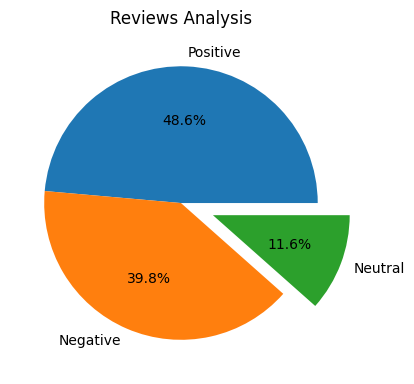

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")

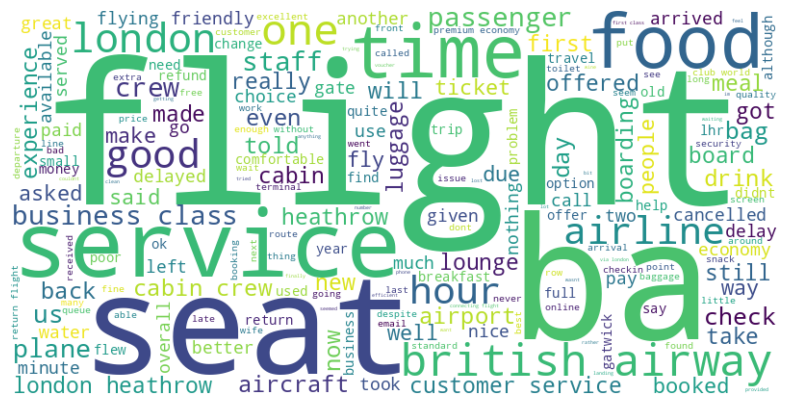

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example: A list of reviews (could be from your web scraping)
reviews_text = " ".join(reviews)  # Combine all reviews into a single string

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
